# Water Spring

In [246]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\A393350\Desklocalhost:8888/notebooks/Desktop/Kaggle/AceaSmartWaterAnalytics/notebookDada.ipynbtop\Kaggle\AceaSmartWaterAnalytics\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [247]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore
import matplotlib.dates as mdates

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## Investigate all Water Spring datasets

In [248]:
df_Amiata = pd.read_csv(r"C:\Users\A393350\Desktop\Kaggle\AceaSmartWaterAnalytics\data/Water_Spring_Amiata.csv")
df_Amiata.head()

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN


In [249]:
df_Lupa = pd.read_csv(r"C:\Users\A393350\Desktop\Kaggle\AceaSmartWaterAnalytics\data/Water_Spring_Lupa.csv")
df_Lupa.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN


In [250]:
df_Madonna = pd.read_csv(r"C:\Users\A393350\Desktop\Kaggle\AceaSmartWaterAnalytics\data/Water_Spring_Madonna_di_Canneto.csv")
df_Madonna.head()

,Date,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
0,01/01/2012,0.0,5.25,NaN
1,02/01/2012,5.6,6.65,NaN
2,03/01/2012,10.0,8.85,NaN
3,04/01/2012,0.0,6.75,NaN
4,05/01/2012,1.0,5.55,NaN


## Choose Amiata - dataset, investigate missing values and Ground_Water

In [251]:
df = df_Amiata
df.columns

Index(['Date', 'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta'],
      dtype='object')

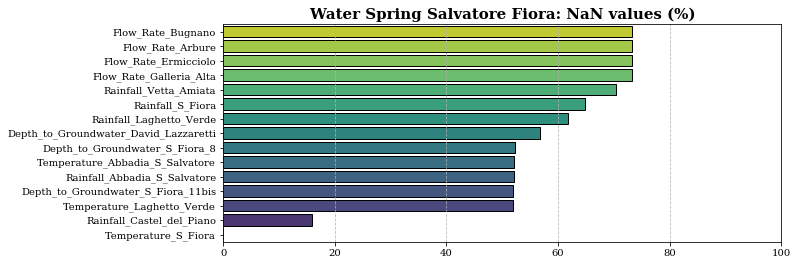

Half of the amount of data in Groundwater is null values


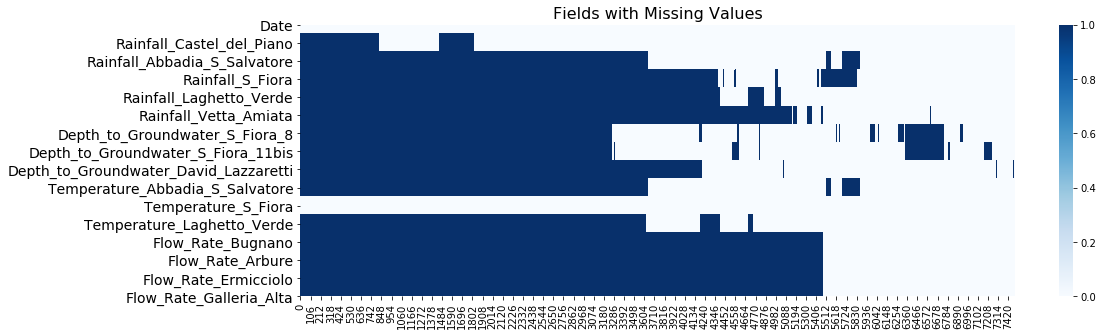

In [252]:
# all cols
feature_col = list(df.columns[1:])

#Check missing values
NaN_values = (df[feature_col].isnull().sum() / len(df) * 100).sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (10, 4))
plt.title('Water Spring Salvatore Fiora: NaN values (%)', size = 15, fontweight = 'bold', fontfamily = 'serif')
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
sns.barplot(x = NaN_values, y = NaN_values.index, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("viridis", len(NaN_values.index))))
ax.set_xlim((0, 100))    
ax.set_xticklabels(range(0, 101, 20), fontfamily = 'serif')
ax.set_yticklabels(NaN_values.index, fontfamily = 'serif')
ax.grid(axis = 'x', linestyle = '--', alpha = 0.9)
plt.show()

print("Half of the amount of data in Groundwater is null values")

# see missing values in timeframe
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
# for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

The earliest date: 	2000-01-01T00:00:00.000000000
The latest date: 	2020-06-30T00:00:00.000000000
(7487, 17)


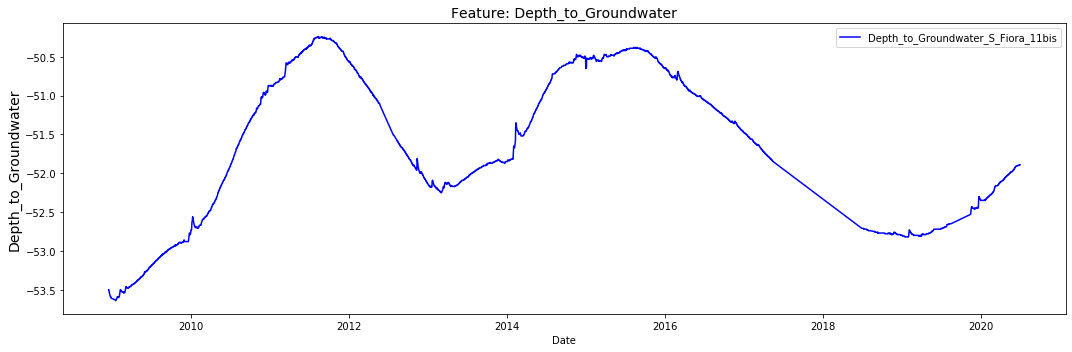

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7487 entries, 0 to 7486
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype          
---  ------                                 --------------  -----          
 0   Date                                   7487 non-null   datetime64[ns] 
 1   Rainfall_Castel_del_Piano              6291 non-null   float64        
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64        
 3   Rainfall_S_Fiora                       2633 non-null   float64        
 4   Rainfall_Laghetto_Verde                2865 non-null   float64        
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64        
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64        
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64        
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64        
 9   Temperature_Abbadia_S_Salvatore        3583 non-null

In [255]:
# adjust format of Date
from datetime import datetime, date 
df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head()

# get dates timeframe
print('The earliest date: \t%s' %df['Date'].values[[0, -1]][0])
print('The latest date: \t%s' %df['Date'].values[[0, -1]][1])
print(df.shape)

# create plot
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))  
sns.lineplot(x=df['Date'].where(df['Depth_to_Groundwater_S_Fiora_11bis'].notnull()), y=df['Depth_to_Groundwater_S_Fiora_11bis'].fillna(np.inf), ax=ax, color='blue',label='Depth_to_Groundwater_S_Fiora_11bis')
ax.set_title('Feature: {}'.format('Depth_to_Groundwater'), fontsize=14)
ax.set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)
plt.tight_layout()
plt.show()

# check null values
df.info()

In [256]:
# difference from today to previous day
df = df.sort_values(by='Date')
df['Time_Interval'] = df['Date'] - df['Date'].shift(1)
#df[['Date', 'Time_Interval']].head()

# Interpolate missing values

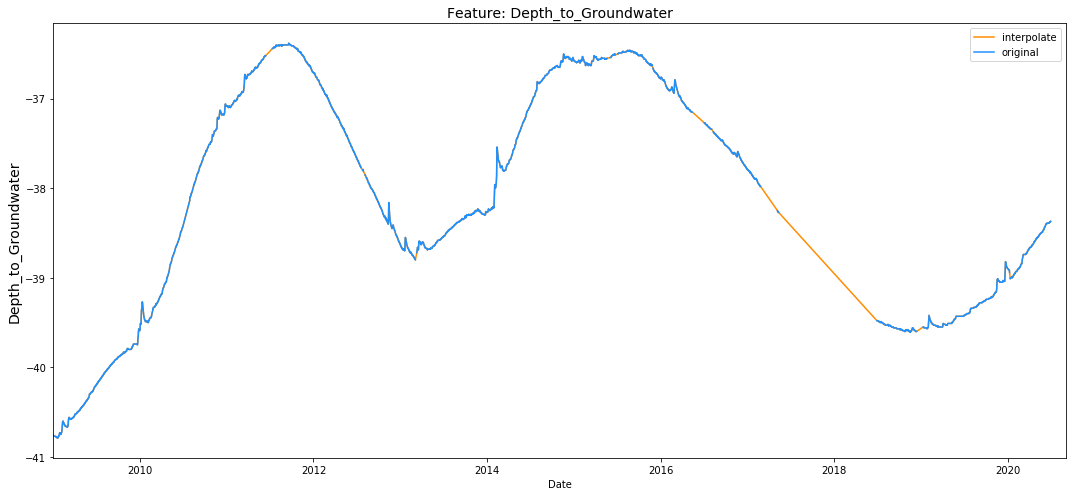

Interpolation over 1-2 years, does it make sense?


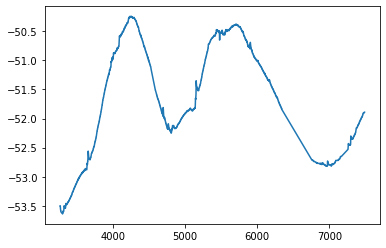

In [267]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_S_Fiora_8.interpolate(), ax=ax, color='darkorange', label = 'interpolate')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_S_Fiora_8.fillna(np.inf), ax=ax, color='dodgerblue', label = 'original')
ax.set_title(f'Feature: Depth_to_Groundwater', fontsize=14)
ax.set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)
ax.set_xlim([date(2009, 1, 1), date(2020, 9, 1)])
# ax[2].set_xlim([date(2000, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

print("Interpolation over 1-2 years, does it make sense?")

df[column].plot()

In [258]:
df = df.rename(columns={"Depth_to_Groundwater_S_Fiora_11bis":"Depth_to_Groundwater"})
df['Depth_to_Groundwater'].isna().sum()

3893

In [259]:
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()
df['Depth_to_Groundwater'].isna().sum()

3274

In [260]:
print("Why do we get less values after interpolation?")

Why do we get less values after interpolation?


In [262]:
print("We still get null values after interpolation")

from statsmodels.tsa.seasonal import seasonal_decompose
core_columns =  ['Depth_to_Groundwater']
for column in core_columns:
    decomp = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq') # .set_index('Date')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

We still get null values after interpolation


ValueError: This function does not handle missing values

In [269]:
print("We still get null values after interpolation")

from statsmodels.tsa.seasonal import seasonal_decompose
core_columns =  ['Depth_to_Groundwater']
for column in core_columns:
    decomp = seasonal_decompose(df[column].notnull(), freq=52, model='additive', extrapolate_trend='freq') # .set_index('Date')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal
    
df.head()

We still get null values after interpolation


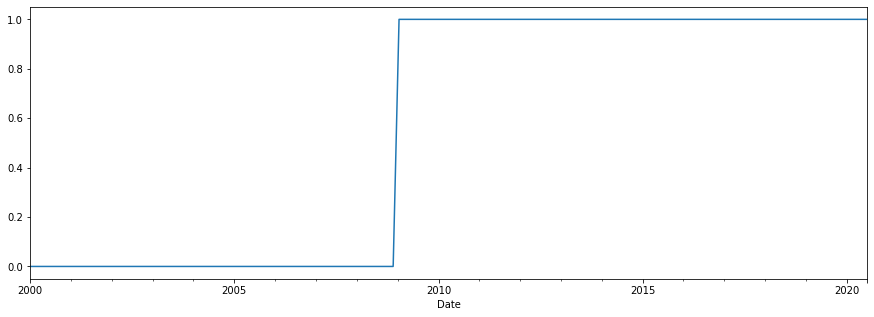

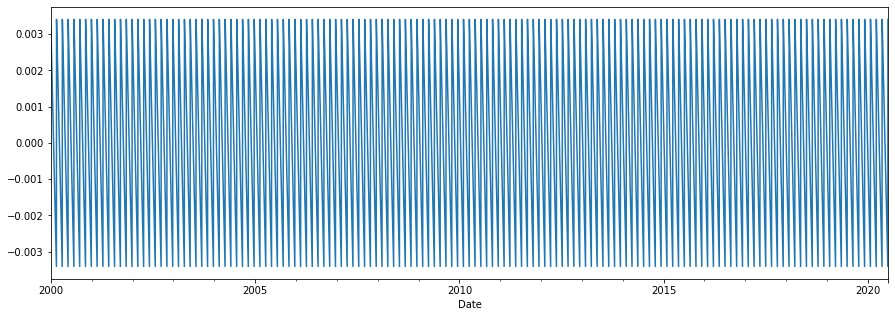

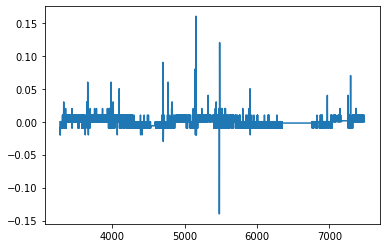

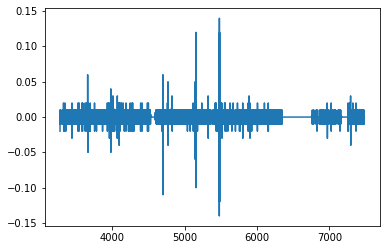

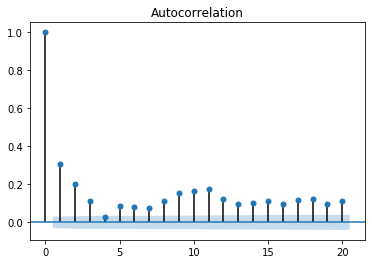

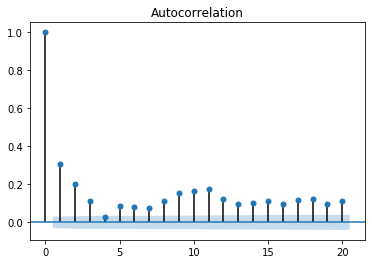

In [285]:
df.set_index("Date")["Depth_to_Groundwater_trend"].plot(figsize=(15,5))
plt.show()
df.set_index("Date")["Depth_to_Groundwater_seasonal"].plot(figsize=(15,5))
plt.show()

df["Depth_test"] = df["Depth_to_Groundwater"].ewm(span=90).mean()
df.set_index("Date")[["Depth_to_Groundwater","Depth_test"]].plot(figsize=(15,5))

from statsmodels.tsa.stattools import adfuller
adfuller(df["Depth_to_Groundwater"].notnull(), autolag='AIC')
# The p-value <0.05 -> the series is stationary

# We will use differenciator as much until we get a test that the data is stationary
df["Depth_to_Groundwater_diff"] = df["Depth_to_Groundwater"].diff()
adfuller(df["Depth_to_Groundwater_diff"].dropna(), autolag='AIC')

# Apply difference to check
df["Depth_to_Groundwater_diff"].plot()
plt.show()

df["Depth_to_Groundwater_diff2"] = df["Depth_to_Groundwater"].diff().diff()
adfuller(df["Depth_to_Groundwater_diff2"].dropna(), autolag='AIC')

# Apply difference to check
df["Depth_to_Groundwater_diff2"].plot()
plt.show()

# Plot against the p-value. where spike is above the blue line, there is a correlation with lags: 1, 4, 5 etc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["Depth_to_Groundwater_diff"].dropna(), lags=20) # the transformed variable looks better

# Plot against the p-value. where spike is above the blue line, there is a correlation with lags: 1, 4, 5 etc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["Depth_to_Groundwater_diff2"].dropna(), lags=20, zero = False) # the transformed variable looks better